### Neural-networks lab1
#### Temirlan Bekkozha

In [ ]:


import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_iris

iris = load_iris()

In [172]:
list (iris.target_names)

['setosa', 'versicolor', 'virginica']

In [173]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [174]:

X = iris.data
Y = iris.target

In [175]:
df = pd.DataFrame(X, columns=iris['feature_names'])
df['target'] = Y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [176]:
import lightgbm as lgb

In [179]:
d_train = lgb.Dataset(X_train,label=y_train,feature_name=iris['feature_names'])
d_test = lgb.Dataset(X_test,label=y_test)

In [180]:
params = {
    'num_leaves': 5,
    'metric': ('l1', 'l2'),
    'verbose': 0
}

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
rslts= {}

In [184]:
gbm = lgb.train(params,
                d_train,
                valid_sets=[d_train, d_test],
                feature_name=iris['feature_names'],
                categorical_feature=[21],
                evals_result=rslts,
                verbose_eval=10)

[10]	training's l1: 0.281502	training's l2: 0.110797	valid_1's l1: 0.32198	valid_1's l2: 0.125026
[20]	training's l1: 0.14402	training's l2: 0.0388269	valid_1's l1: 0.146991	valid_1's l2: 0.0365843
[30]	training's l1: 0.0953191	training's l2: 0.0269268	valid_1's l1: 0.0848034	valid_1's l2: 0.0252897
[40]	training's l1: 0.0845967	training's l2: 0.0233786	valid_1's l1: 0.0790137	valid_1's l2: 0.0254117
[50]	training's l1: 0.0851946	training's l2: 0.0209391	valid_1's l1: 0.0900829	valid_1's l2: 0.0282486
[60]	training's l1: 0.0862005	training's l2: 0.0195205	valid_1's l1: 0.0990413	valid_1's l2: 0.0308601
[70]	training's l1: 0.0845974	training's l2: 0.0186027	valid_1's l1: 0.102787	valid_1's l2: 0.0325478
[80]	training's l1: 0.0830054	training's l2: 0.0178341	valid_1's l1: 0.105901	valid_1's l2: 0.0342057
[90]	training's l1: 0.0825355	training's l2: 0.0172465	valid_1's l1: 0.108444	valid_1's l2: 0.0357216
[100]	training's l1: 0.0807177	training's l2: 0.0166242	valid_1's l1: 0.109034	valid

Plotting feature importances...


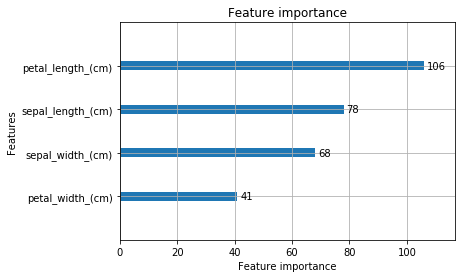

In [185]:
print('Plotting feature importances...')
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

In [186]:
clf = lgb.LGBMClassifier()

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(report)

Accuracy: 97.78%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



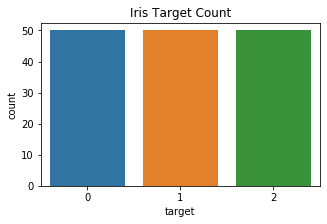

In [188]:
f,ax=plt.subplots(1,figsize=(5,3))
sns.countplot('target',data=df,)
ax.set_title('Iris Target Count')
plt.show()

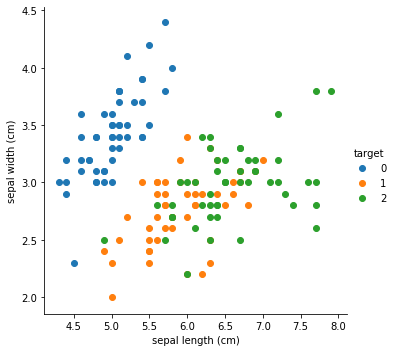

In [191]:
%matplotlib inline
sns.FacetGrid(df,hue='target',size=5)\
.map(plt.scatter,'sepal length (cm)','sepal width (cm)')\
.add_legend()


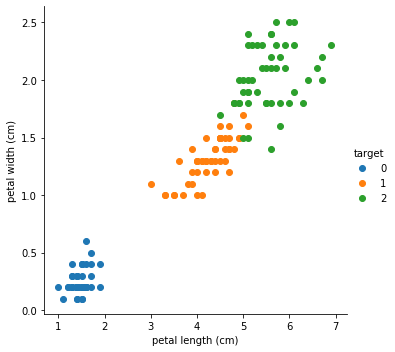

In [190]:
%matplotlib inline
sns.FacetGrid(df,hue='target',size=5)\
.map(plt.scatter,'petal length (cm)','petal width (cm)')\
.add_legend()

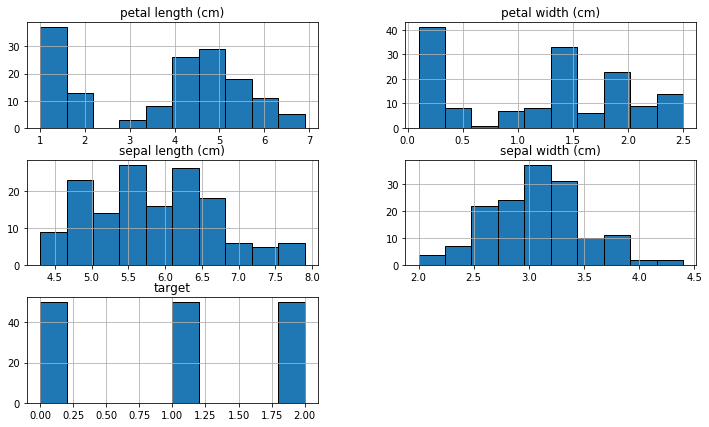

In [192]:
df.hist(edgecolor='black', linewidth=1)
fig=plt.gcf()
fig.set_size_inches(12,7)